In [1]:
## Imports
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#electricity price
e_price = pd.read_csv('./data/e_price.csv')

In [5]:
e_price.head() #hourly electricity price

,time,1001,1002,1003,1004,1005,1006,1007,1008,1009,...,2673,2674,2675,2676,2677,2678,2679,2680,2681,2682
0,2022-09-01 00:00:00,1.2,1.0,1.1,0.32,0.6015,0.2962,0.3041,1.0,0.3067,...,0.7,0.34,0.35,0.72,0.72,0.0,0.72,0.72,1.0,1.05
1,2022-09-01 01:00:00,1.2,1.0,1.1,0.32,0.3314,0.2962,0.3015,1.0,0.3067,...,0.7,0.34,0.35,0.72,0.72,0.0,0.72,0.72,1.0,1.05
2,2022-09-01 02:00:00,1.2,1.0,1.1,0.32,0.3200,0.2962,0.2990,1.0,0.3067,...,0.7,0.34,0.35,0.72,0.72,0.0,0.72,0.72,1.0,1.05
3,2022-09-01 03:00:00,1.2,1.0,1.1,0.32,0.3200,0.2962,0.2990,1.0,0.3067,...,0.7,0.34,0.35,0.72,0.72,0.0,0.72,0.72,1.0,1.05
4,2022-09-01 04:00:00,1.2,1.0,1.1,0.32,0.3200,0.2962,0.2990,1.0,0.3067,...,0.7,0.34,0.35,0.72,0.72,0.0,0.72,0.72,1.0,1.05


In [7]:
e_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Columns: 1683 entries, time to 2682
dtypes: float64(1682), object(1)
memory usage: 112.5+ MB


## Electricity Price Data Dictionary

The 'electricity price' dataframe is the total price of electricity in Yuan (1 yuan == 5.2 Baht) per each hour of charging.

| Variable | Description | Details |
|----------|-------------|---------|
| time | Time | Year-Month-Day Hour:Minute:Seconds |
| 1001-2682 | Station IDs | Charging Station IDs from 1001 to 2682. |

In [ ]:
# choose a random station (station no. 1009).

In [9]:
e_price_1009 = e_price[['time', '1009']] #station 1001 electricity price (does it use fixed pricing or dynamic pricing
e_price_1009.head()

,time,1009
0,2022-09-01 00:00:00,0.3067
1,2022-09-01 01:00:00,0.3067
2,2022-09-01 02:00:00,0.3067
3,2022-09-01 03:00:00,0.3067
4,2022-09-01 04:00:00,0.3067


In [13]:
e_price.describe().round(2)

,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,...,2673,2674,2675,2676,2677,2678,2679,2680,2681,2682
count,8760.0,8760.0,8760.0,8760.00,8760.00,8760.00,8760.00,8760.0,8760.00,8760.00,...,8760.0,8760.00,8760.00,8760.00,8760.00,8760.0,8760.00,8760.00,8760.0,8760.00
mean,1.2,1.0,1.1,0.74,0.74,0.71,0.70,1.0,0.70,0.65,...,0.7,0.77,0.65,0.72,0.72,0.0,0.72,0.72,1.0,1.05
std,0.0,0.0,0.0,0.33,0.33,0.32,0.31,0.0,0.33,0.33,...,0.0,0.26,0.24,0.00,0.00,0.0,0.00,0.00,0.0,0.00
min,1.2,1.0,1.1,0.32,0.32,0.30,0.30,1.0,0.24,0.24,...,0.7,0.34,0.35,0.72,0.72,0.0,0.72,0.72,1.0,1.05
25%,1.2,1.0,1.1,0.32,0.32,0.30,0.30,1.0,0.31,0.24,...,0.7,0.44,0.35,0.72,0.72,0.0,0.72,0.72,1.0,1.05
50%,1.2,1.0,1.1,0.79,0.79,0.74,0.74,1.0,0.74,0.70,...,0.7,0.77,0.65,0.72,0.72,0.0,0.72,0.72,1.0,1.05
75%,1.2,1.0,1.1,1.05,1.10,1.09,1.09,1.0,1.05,1.02,...,0.7,1.06,0.95,0.72,0.72,0.0,0.72,0.72,1.0,1.05
max,1.2,1.0,1.1,1.40,1.40,1.09,1.09,1.0,1.41,1.31,...,0.7,1.13,0.95,0.72,0.72,0.0,0.72,0.72,1.0,1.05


In [21]:
# are there negative electricity prices?
e_price.min().unique()

array(['2022-09-01 00:00:00', 1.2, 1.0, 1.1, 0.32, 0.2962, 0.2442, 0.24,
       1.3, 1.28, 1.7, 0.8755, 0.6998, 0.27, 0.298, 0.29, 1.23, 0.737,
       0.8, 0.9, 0.72, 0.3, 0.26, 0.34, 1.045, 1.05, 0.28, 0.95, 0.35,
       0.7, 0.717, 0.385, 1.25, 0.2655, 0.54, 0.0, 0.25, 1.08, 0.3201,
       0.86, 0.73, 0.4, 2.8, 1.8, 1.21, 1.06, 0.237, 0.23, 0.901, 0.5,
       0.98, 0.399, 1.15, 0.256, 1.5, 0.75, 0.52, 0.33, 1.04, 0.45, 0.77,
       0.69, 0.82, 0.71, 1.33, 0.2485, 0.816, 0.2676, 0.6879, 0.38, 1.03,
       1.01, 0.3044, 0.2794, 1.32, 1.18, 0.93, 1.6, 0.938, 0.3094, 0.92,
       0.2, 1.036, 0.31, 0.2801, 0.41, 0.2594, 1.14, 0.78, 0.699, 0.4801,
       0.76, 0.85, 1.16, 0.96, 0.83, 1.086, 0.79, 0.6999, 0.36, 0.74,
       1.35, 0.89, 0.2905, 0.7484, 1.43, 1.34, 1.17, 0.284, 0.3194, 1.24,
       1.27, 0.3161, 0.68, 1.199, 0.47, 0.7384, 0.2374, 0.84, 0.88,
       0.3405, 1.09, 5.0, 0.2779, 0.703, 0.2587, 0.396, 0.2844, 0.94, 1.4,
       0.3962, 0.2938, 0.3618, 0.997, 1.11, 0.81, 0.7699, 0.9

In [39]:
np.max(e_price.iloc[:, 1:])

5.0

In [41]:
e_price.columns[(e_price == 5.0).any()].tolist() #most expensive electricity price is station 2038, 5 yuan

['2038']

In [45]:
e_price_baht = e_price.iloc[:, 1:] * 5.2 #not sure if I need to convert to Baht

In [47]:
e_price_2038 = e_price[['time', '2038']]

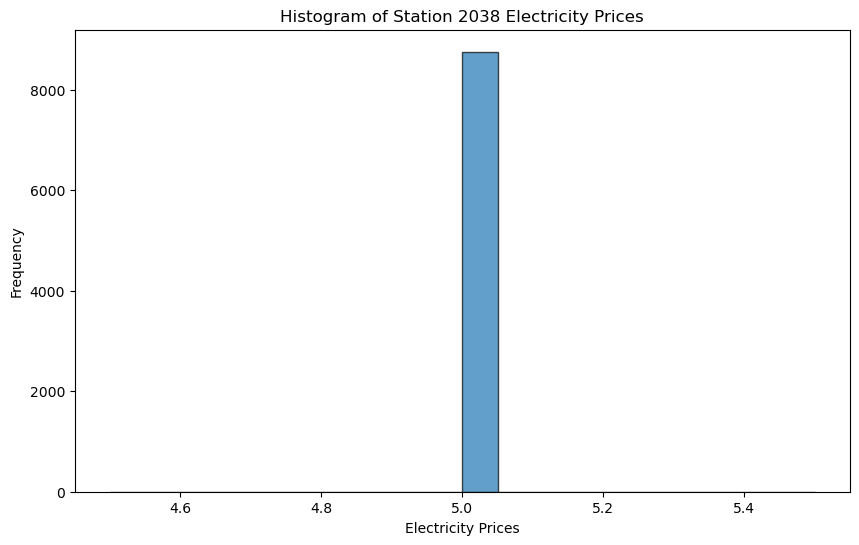

In [49]:
plt.figure(figsize=(10, 6)) 
plt.hist(e_price['2038'], bins=20, edgecolor='black', alpha=0.7) 
plt.xlabel('Electricity Prices') 
plt.ylabel('Frequency') 
plt.title('Histogram of Station 2038 Electricity Prices')
plt.show() 

In [51]:
e_price['2038'].unique()

array([5.])

In [53]:
num_zeros = (e_price == 0).sum().sum()
(num_zeros/(e_price.size))*100 #30% of the data is 0 in price. Reasons for zero: idle station, blackout, discontinued use etc. which are information for analysis.

0.3069914834620717

In [55]:
e_price_2675 = e_price[['time', '2675']]

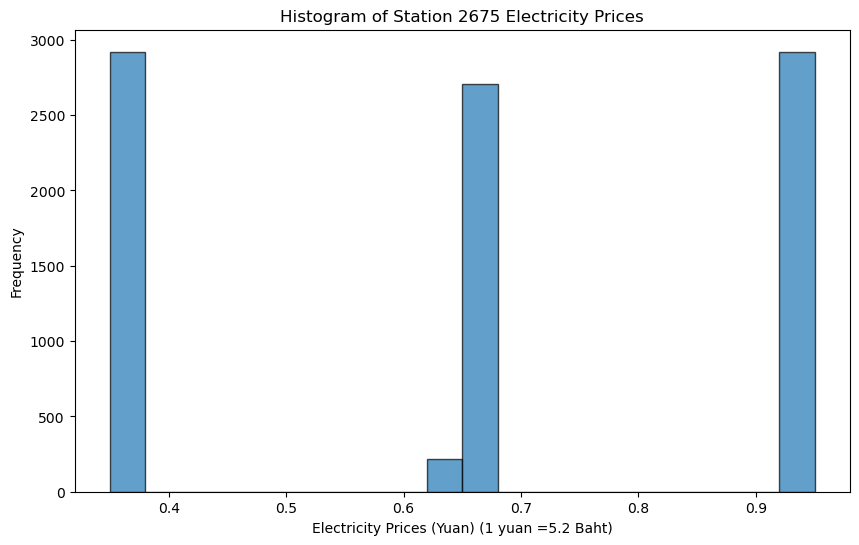

In [61]:
plt.figure(figsize=(10, 6)) 
plt.hist(e_price['2675'], bins=20, edgecolor='black', alpha=0.7) 
plt.xlabel('Electricity Prices (Yuan) (1 yuan =5.2 Baht)') 
plt.ylabel('Frequency') 
plt.title('Histogram of Station 2675 Electricity Prices')
plt.show() #electricity prices discrete values

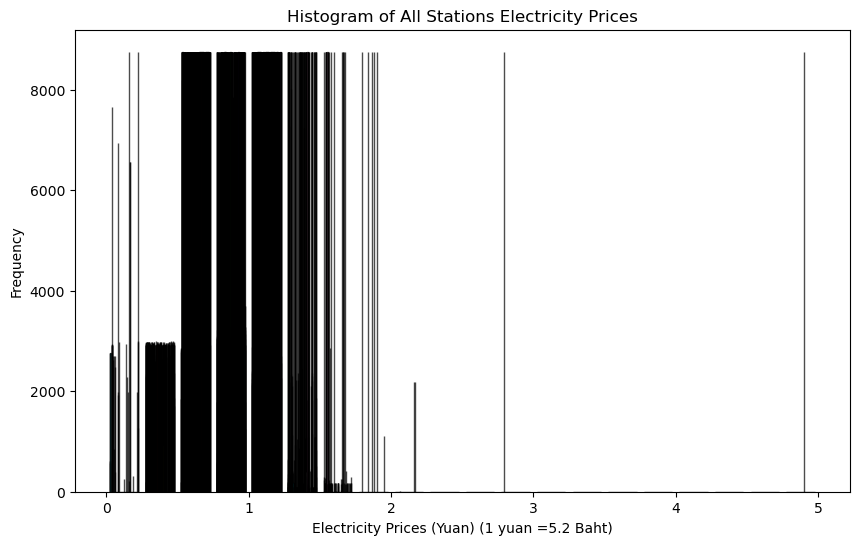

In [63]:
plt.figure(figsize=(10, 6)) 
plt.hist(e_price.iloc[:, 1:], bins=20, edgecolor='black', alpha=0.7) 
plt.xlabel('Electricity Prices (Yuan) (1 yuan =5.2 Baht)') 
plt.ylabel('Frequency') 
plt.title('Histogram of All Stations Electricity Prices')
plt.show() #most are under 2 yuan (2* 5.2 = 10.4 baht) 

In [ ]:
# Summary, no zeroes were dropped and no outliers were removed as the price data contains important information on the charging station.